<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/%5BML%5D_%EC%84%B1%EB%8A%A5_%ED%8F%89%EA%B0%80_metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류 문제 추가 Metric

## 데이터 생성

In [1]:
import numpy as np

seed = 1234
np.random.seed(seed)

# 데이터 생성
num_sample_per_class = 250

X_class1 = np.random.normal(2, 2, (num_sample_per_class, 2))
X_class2 = np.random.normal(-2, 2, (num_sample_per_class, 2))


X_ = np.vstack([X_class1, X_class2]) # feature 두 개를 묶어주고 (250, 2) + (250, 2) -> (500, 2)
X = np.hstack([np.ones((num_sample_per_class * 2, 1)), X_]) # 1개의 bias를 추가 (500, 2) -> (500, 3)
y = np.array([1] * num_sample_per_class + [0] * num_sample_per_class)  # 클래스 레이블 생성

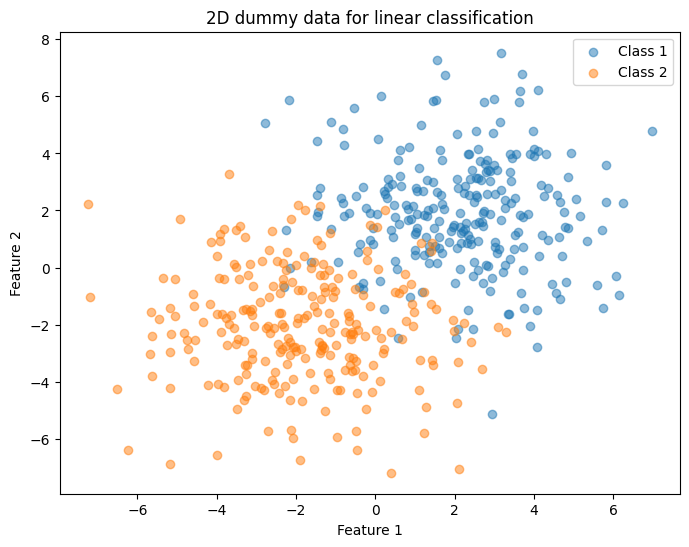

In [2]:
import matplotlib.pyplot as plt

# 클래스별 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_class1[:, 0], X_class1[:, 1], alpha=0.5, label='Class 1')
plt.scatter(X_class2[:, 0], X_class2[:, 1], alpha=0.5, label='Class 2')

# 그래프 설정
plt.title('2D dummy data for linear classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# 그래프 출력
plt.show()


## Logistic Regression 모델 생성 및 학습과 결과 보기

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

LogisticRegression()

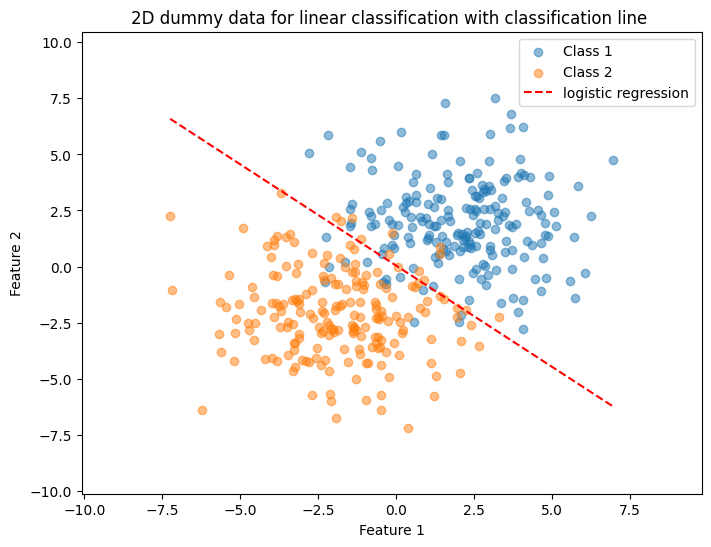

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 1][:, 1], X_train[y_train == 1][:, 2], alpha=0.5, label='Class 1')
plt.scatter(X_train[y_train == 0][:, 1], X_train[y_train == 0][:, 2], alpha=0.5, label='Class 2')

w0 = logistic_reg.intercept_[0]
w1, w2 = logistic_reg.coef_[0][1:]

feauter1_value = np.array([X[:, 1].min(), X[:, 1].max()])
feature2_value = -(w0 + w1 * feauter1_value) / w2

plt.plot(feauter1_value, feature2_value, color='red', linestyle='--', label='logistic regression')

plt.title('2D dummy data for linear classification with classification line ')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.margins(0.2)
plt.legend()

plt.show()

## Confusion Matrix, ROC, AUC 적용

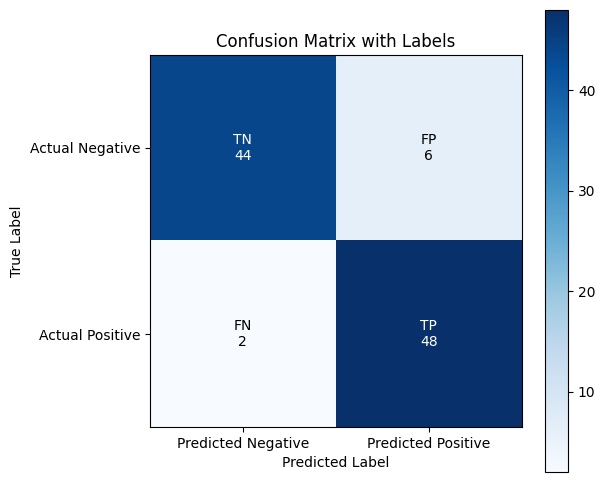

In [5]:
from sklearn.metrics import confusion_matrix

y_pred = logistic_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(6, 6))

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted Negative', 'Predicted Positive'])
plt.yticks(tick_marks, ['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Labels')

labels = ['TN', 'FP', 'FN', 'TP']
label_values = [cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]]
label_colors = ['white', 'black', 'black', 'white']
indices = [(0, 0), (0, 1), (1, 0), (1, 1)]

for label, value, color, (i, j) in zip(labels, label_values, label_colors, indices):
    plt.text(j, i, f'{label}\n{value}', ha='center', va='center', color=color)

plt.show()


In [7]:
from sklearn.metrics import roc_curve

# 각 데이터가 양성일 확률, 양성만 취할 예정이므로 1 위치의 값만 가져옴
# 예측 확률을 가지고 Roc 커브를 그려줘!! 0-100 % 까지 커브를 그려줘
y_pred_proba = logistic_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

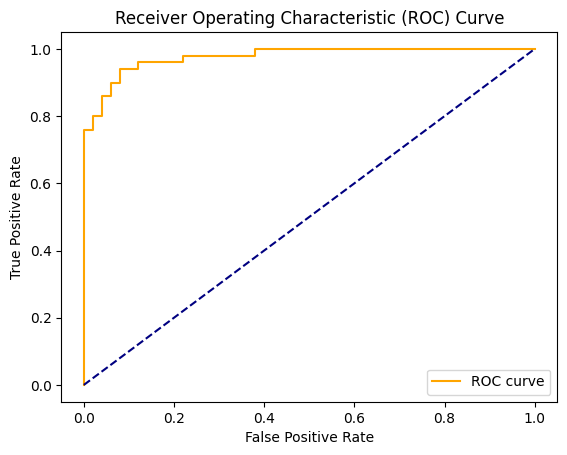

In [8]:
# ROC 커브 시각화
plt.plot(fpr, tpr, color='orange', label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # y=x 직선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [9]:
# 최적 threshold 위치 찾기
# tpr은 크고 fpr은 작아야하므로 아래와 같은 코드로 위치를 선정
closest_leftupper_conner = np.argmin(np.abs(tpr - 1) + fpr)
optimal_threshold = thresholds[closest_leftupper_conner]
print(f'가장 좌측 상단에 위치한 포인트의 threshold 값 : {optimal_threshold}')

가장 좌측 상단에 위치한 포인트의 threshold 값 : 0.6006122864959837


50% 기준이아닌 60.06% 가 제일 좋은 수치이다

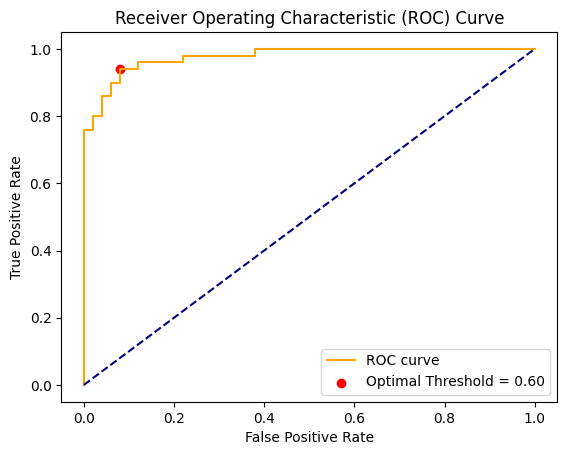

In [10]:
# Optimal Point를 포함하는 ROC 커브 시각화
plt.plot(fpr, tpr, color='orange', label=f'ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # y=x 직선
plt.scatter(fpr[closest_leftupper_conner],
            tpr[closest_leftupper_conner],
            color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [12]:
from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)
print(f'ROC 커브로부터 구한 AUC : {roc_auc}')

ROC 커브로부터 구한 AUC : 0.9768


# 회귀 문제 추가 Metric

## 데이터 생성

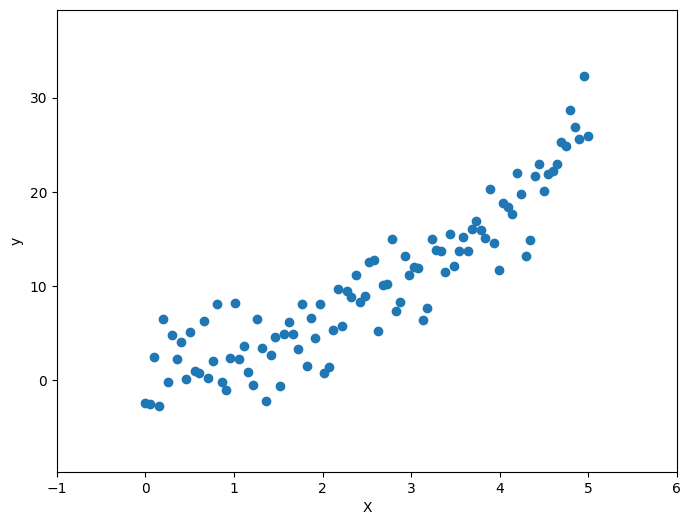

In [13]:
# 데이터 생성 변수
w0 = 2.3
w1 = 1
num_data = 100
noise = np.random.normal(0, 3, num_data)

# 데이터 생성
X = np.linspace(0, 5, num_data)
y = w0 + w1 * (X ** 2) + noise

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.margins(0.2)
plt.show()

## Linear Regression 모델 생성 및 학습 & 결과 확인

In [14]:
from sklearn.linear_model import LinearRegression

X = X.reshape(-1, 1) # 학습을 위한 차원 변환 진행

linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression()

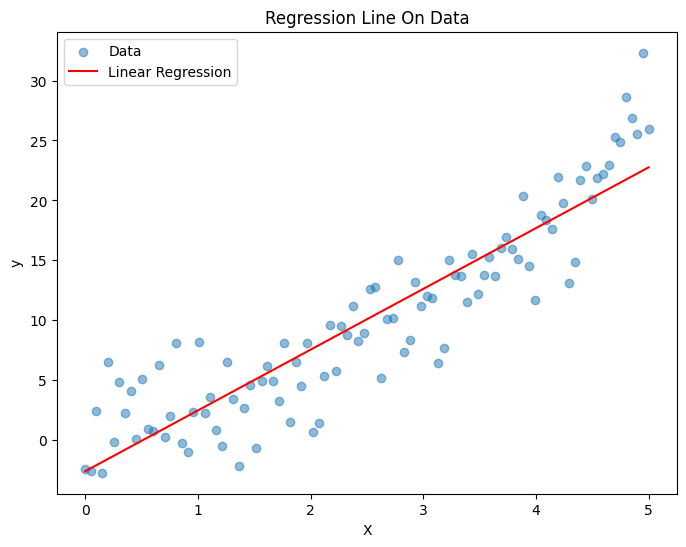

In [15]:
# 회귀선 시각화
y_pred = linear_reg.predict(X)

plt.figure(figsize=(8, 6))

plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X, y_pred, color='red', label=f'Linear Regression')

plt.title('Regression Line On Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## R2 값 확인

In [16]:
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print(f'R² 값 : {r2:.4f}')

R² 값 : 0.8278


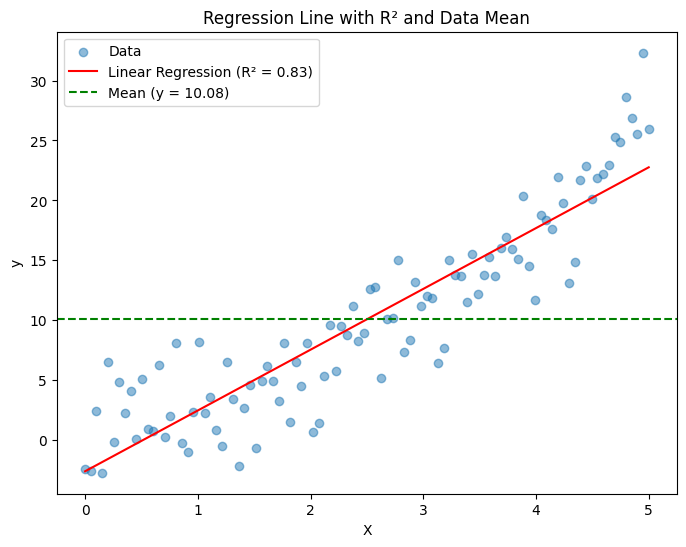

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R² = {r2:.2f})')

y_mean = np.mean(y)
plt.axhline(y=y_mean, color='green', linestyle='--', label=f'Mean (y = {y_mean:.2f})')

plt.title('Regression Line with R² and Data Mean')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()